<a href="https://colab.research.google.com/github/ninjaabhinav/classical-ml-projects/blob/main/Customer_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
from io import StringIO
import pandas as pd

csv_data = """
gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn
Female,0,Yes,No,1,No,DSL,29.85,29.85,No
Male,0,No,No,34,Yes,Fiber optic,56.95,1889.5,Yes
Male,0,No,No,2,Yes,Fiber optic,53.85,108.15,Yes
Female,0,No,No,45,No,DSL,42.30,1840.75,No
Female,0,No,No,2,Yes,DSL,70.70,151.65,Yes
Male,0,No,No,8,Yes,Fiber optic,99.65,820.5,Yes
Female,0,Yes,Yes,22,Yes,Fiber optic,89.10,1949.40,No
Female,0,Yes,No,10,Yes,Fiber optic,29.75,301.90,No
"""

df = pd.read_csv(StringIO(csv_data))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,DSL,29.85,29.85,No
1,Male,0,No,No,34,Yes,Fiber optic,56.95,1889.50,Yes
2,Male,0,No,No,2,Yes,Fiber optic,53.85,108.15,Yes
3,Female,0,No,No,45,No,DSL,42.30,1840.75,No
4,Female,0,No,No,2,Yes,DSL,70.70,151.65,Yes


In [3]:
df_big = pd.concat([df] * 125, ignore_index=True)
df_big = df_big.sample(1000, random_state=42).reset_index(drop=True)

df_big.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,34,Yes,Fiber optic,56.95,1889.50,Yes
1,Male,0,No,No,34,Yes,Fiber optic,56.95,1889.50,Yes
2,Female,0,No,No,2,Yes,DSL,70.70,151.65,Yes
3,Female,0,No,No,2,Yes,DSL,70.70,151.65,Yes
4,Female,0,No,No,45,No,DSL,42.30,1840.75,No


In [4]:
df_big.shape

(1000, 10)

In [5]:
df_big.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
InternetService,0
MonthlyCharges,0
TotalCharges,0
Churn,0


In [6]:
df_big['Churn'].value_counts()

,count
Churn,
Yes,500
No,500


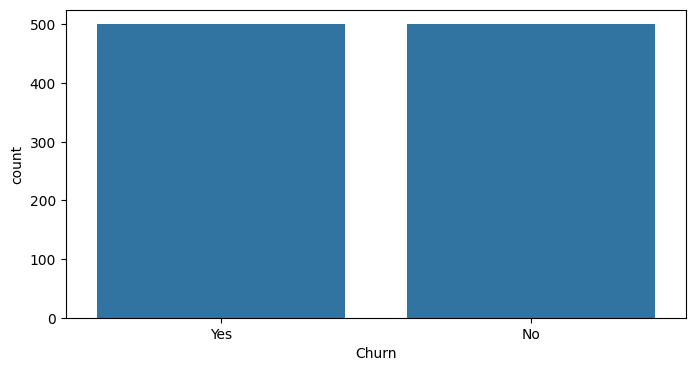

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_big, x='Churn')
plt.show()

In [8]:
X = df_big.drop("Churn", axis=1)
y = df_big["Churn"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService']
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Random Forest": RandomForestClassifier(),
    "SVM (RBF)": SVC()
}

results = {}

for name, model in models.items():
    clf = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', model)
    ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

results

{'Logistic Regression': 1.0, 'Random Forest': 1.0, 'SVM (RBF)': 1.0}

In [12]:
best_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier())
])

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[105   0]
 [  0  95]]

Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       105
         Yes       1.00      1.00      1.00        95

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

